# **Исследование данных о продаже игр**

Доступно: данные о продаже игр, оценки пользователей и экспертов, жанры и платформы. 

**Цель исследования:**
1. Провести предварительную подготвку данных: привести к "змеиному" регистру, очистить данные от пропусков, преобразовать тип данных, добавить отдельный столбец для суммарных продаж по регионам.
2. Провести анализ данных за актуальный период.
3. Составить портрет пользователя каждого региона
4. Проверить гипотезы о равенстве средних пользовательских рейтингах платформ Xbox One и PC и пользовательских рейтингах жанров Action и Sports.
5. Сделать общий вывод.

**Ход исследования:**
1. Обзор и подготовка данных
2. Анализ отзывов на количество продаж
3. Строятся графики продаж по платформам и по жанрам, находится корреляция между отзывами и продажами
4. Портрет пользователя по регионам
5. Проверка гипотез
6. Общий вывод

# Итоговый вывод

Рекомендуемые платформы: Xbox One (как замена очень популярной в прошлом, но не в 2016 году Xbox 360) и PS4.

Самый популярный жанр - шутер (он более стабилен, хоть экшн и имеет больше очень популярных игр)

Для рекламы на северо-американском и евпропейском игры лучше выпускать игры с рейтингом M (эти два региона можно объединить в один рынок, портреты пользователей очень схожи)

Обращать внимание на отзывы покупателей нет особого смысла, в то время как отзывы критиков могут помочь принять решение.

# **Предварительный обзор**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.rename(columns=str.lower, inplace=True)
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.upper()
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Названия всех столбцов, а также типы данных object приведены к нижнему регистру (помимо рейтинга - оставлен и уточнён верхний регистр). После очистки данных от пропусков можно будет заменить тип данных для года и оценки критиков на натуральные числа (здесь не нужны вещественные), а оценку пользователей - на вещественные числа взамен типу object. Количество продаж по всем регионам - неделимое, поэтому тип данных - int.

**Пропуски**

Пропуски в названии имён - странны, это может оказаться каким-либо дубликатом. Поскольку таких всего два, их можно удалить.

Пропуск в дате выпуска - то, что невозможно заполнить и то, что повлияет на анализ при определении актуального периода, поэтому такие данные тоже нет смысла рассматривать (нельзя брать "медианный" или "средний" год - это скорее категориальные данные)

Пропуск с жанрами - такая же логика, как с именами.

Пропуски в оценке критиков можно было бы заполнить, но анализ проводится в том числе по тому, какой жанр игры получит бОльшую оценку и заполнение пропусков может привести к смещению оценки (например, оценка не дана, потому что в этой сфере пробивается мало игр, соответсвенно существуют какие-то, на которые обратили внимание и множество тех, для которых критики решили даже не ставить оценку)

Такая же логика для рейтинга потребителей. tbd - To Be Determined, эта оценка ещё не дана пользователями (например, игра только вышла), такие данные не имеет смысла анализировать.

Возрастную категорию нельзя заполнить - это категориальные данные.

Стоит так же отметить, что, возможно, пропуски имеются в основном в данных, которые сейчас неактуальны, но это требует проверки.

In [3]:
data.dropna(0, subset=['name', 'year_of_release', 'genre'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)

In [4]:
data.pivot_table(index='year_of_release', values=['critic_score'], aggfunc={'count'})

,critic_score
,count
year_of_release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0


В целом, активно рецензии от критиков начали активно писаться с 2002 года.

In [5]:
data.pivot_table(index='year_of_release', values=['user_score'], aggfunc={'count'})

,user_score
,count
year_of_release,
1980,0
1981,0
1982,0
1983,0
1984,0
1985,1
1986,0
1987,0


Такая же ситуация с оценками от пользователей. При этом, за оба периода видно, что в 2016 году оценок мало.

In [6]:
data_tbd = data[(data['user_score'] == 'tbd')]
data_tbd.pivot_table(index='year_of_release', values=['user_score'], aggfunc={'count'})

,user_score
,count
year_of_release,
1997,1
1999,8
2000,43
2001,82
2002,192
2003,95
2004,107
2005,121


Оценки 'tbd' резко снижаются с 2012 года, с этого периода пользователям, возможно, стало удобнее ставить свои оценки. В 2012-2016 годы такого вида оценок мало (порядка 7%).

In [7]:
data_critic_score_na = data[data['critic_score'].isna()].sort_values(by = 'year_of_release')
data_critic_score_na['critic_score'] = 1 #для удобного подсчёта по годам
data_critic_score_na.pivot_table(index='year_of_release', values=['critic_score'], aggfunc={'sum'})

,critic_score
,sum
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16


Получается, что больше половины оценок критиков за 2012-2016 годы отсутсвуют. Тем не менее, заполнять данные было бы противоречиво некоторым целям исследования

In [8]:
data_user_score_na = data[data['user_score'].isna()].sort_values(by = 'year_of_release')
data_user_score_na['user_score'] = 1
data_user_score_na.pivot_table(index='year_of_release', values=['user_score'], aggfunc={'sum'})

,user_score
,sum
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,13
1986,21
1987,16


Оценок от пользователей несколько больше, но всё ещё примерно пополам присутсвие и отсутсвие данных.

Для составления анализа на 2017 год вряд ли акутальны данные старше 2012 года (рынок игр за 5 лет мог полностью поменяться)

**Суммарные продажи по регионам**

In [9]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [10]:
data #проверка

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В системе Entertainment Software Rating Board существуют следующие варианты оценки: Early childhood, Everyone, Everyone +10, Teen, Matur, Adults Only. В рейтинге рассматрваемых данных K-A (kids to adults) и E - одно и то же.

In [12]:
data['rating'] = data['rating'].str.replace('K-A', 'E')

In [13]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN) #без замены не приветси к вещественному виду, чтобы можно было
                                                               #анализировать как число в случае необходимости
data['user_score'] = data['user_score'].astype(float) 
#в оценках критиков есть пропуски, поэтому тип не изменить
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [14]:
# Комментарий ревьюера 0
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

In [15]:
# Комментарий ревьюера 0
a, b = len(data[data.sum_sales == 0]), len(data)
a, b, round(a/b*100, 2)

(2, 16444, 0.01)

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Исправила! Теперь около процента

# **Исследовательский анализ данных**

**3.1 Анализ игр по годам** Требуется определить, важны ли данные за все периоды и динамику изменения продаж.

Как уже было сказано ранее, данные за все периоды рассматривать на этом этапе не обязательно (в случае рассмотрения продаж по платформам лучше рассматривать данные за все года, чтобы иметь лучшее представление)

Text(0.5, 0, 'Год выпуска')

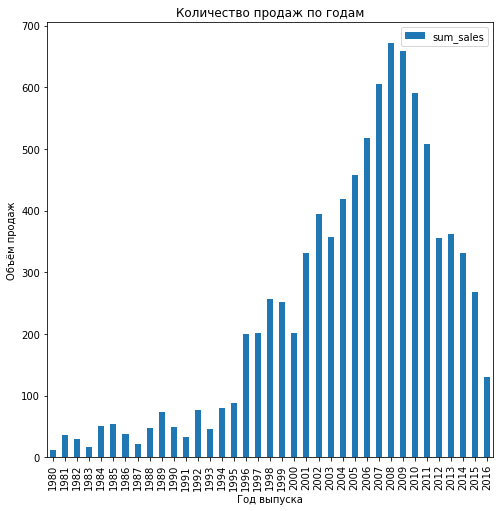

In [16]:
(
    data.pivot_table(index='year_of_release', values=['sum_sales'], aggfunc='sum')
    .plot(kind='bar', figsize=(8, 8), title='Количество продаж по годам')
)
plt.ylabel('Объём продаж')
plt.xlabel('Год выпуска')

Пик зафиксированных продаж пришёлся на 2008 год, при этом далее происходит постепенный спад. Так же нужно помнить о том, что на период 2008-2010 года приходится появление в общем доступе и распространение торрент-файлов, то есть покупки игр могли снизиться и "благодаря" этому. За 2016 год, скорее всего, ещё доступны не все данные (особенно если считать, что сейчас декабрь 2016)

**3.2 Просмотр продаж игр по платформам** Выбираются платформы с наибольшими суммарными продажами и строится распределение по годам. Необходимо определить характерный срок для появления и исчезания платформы.

(0.0, 2.0)

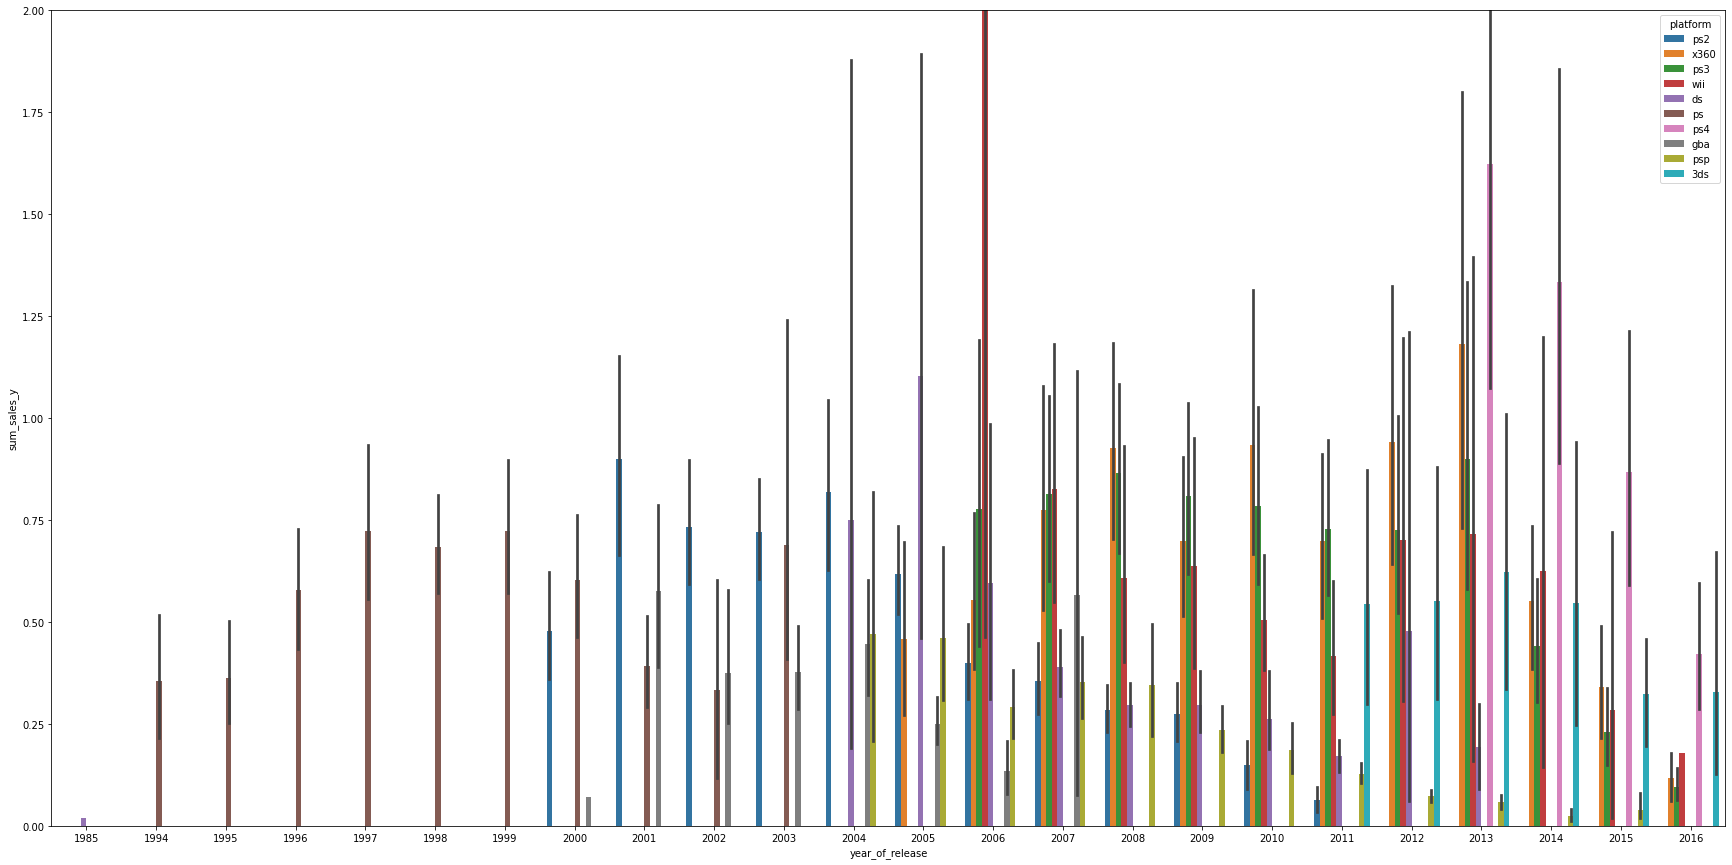

In [17]:
data_platform_1 = (
    data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .head(10)
)
data_platform_1 = data_platform_1.merge(data, on='platform')[['platform', 'year_of_release' ,'sum_sales_y']]
data_platform_1['sum_sales_y'] = data_platform_1[data_platform_1['sum_sales_y'] > 0]['sum_sales_y']
#data_platform_1['year_of_release'] = data_platform_1[data_platform_1['year_of_release'] >= 2000]['year_of_release']
data_platform_1 = data_platform_1.dropna()
data_platform_1['year_of_release'] = data_platform_1['year_of_release'].astype(int)
sns.barplot(data=data_platform_1, x='year_of_release', y='sum_sales_y', hue='platform')
plt.gcf().set_size_inches(30,15)
plt.ylim(0, 2)

Из графика видно, что появилось множество конкурентных платформ появилось только с 2006 года. При этом, новые популярные платформы появляются в среднем раз в 5 лет и набирают максимум своей популярности на 1-2 год после выпуска. Платформы начинают терять популярность с выходом нового поколения (что логично). За рассматриваемый период многие популярные платформы исчезли, заменившись новым поколением или потеряв популярность по другим причинам.

**3.3 Определение актуального периода** Актуальный период - позволяющий построить прогноз на 2017 год. 

Возьмём как актуальный период - период с 2012, так как это год, имеющий большое количество платформ, всё ещё актуальных в 2016 и продажи за 2012-2015 примерно равны.

In [18]:
data_scores = data.loc[data['year_of_release'] > 2011].copy()
#без .copy() выдавал ошибку "A value is trying to be set on a copy of a slice from a DataFrame."
data_scores['critic_score'] = data_scores['critic_score'].astype(int, errors='ignore')
data_scores['user_score'] = data_scores['user_score'].astype(float, errors='ignore') 
data_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


In [19]:
for v in data_scores['genre'].unique():
    print(v, data_scores[data_scores['genre'] == v]['genre'].count())

action 1031
shooter 235
role-playing 370
platform 85
misc 192
simulation 80
sports 268
fighting 109
racing 115
strategy 71
adventure 302
puzzle 28


In [20]:
# Комментарий ревьюера
len(data[data['year_of_release'] > 2011]), len(data_scores)

(2886, 2886)

В полученной выборке представлены все типы жанров игр.

In [21]:
# Комментарий ревьюера 00
# Посмотрим, что осталось в сокращенном датасете
temp = data_scores.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           1611 non-null   object 
 11  sum_sales        2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zumba fitness rush' 'zumba fitness: world party'
 'zyuden sentai kyoryuger: g

**3.4 Определение лидирующий платформ:** Лидирующие платформы - имеющие наибольшее количество продаж, то есть они приносят (потенциально) наибольшую прибыль.

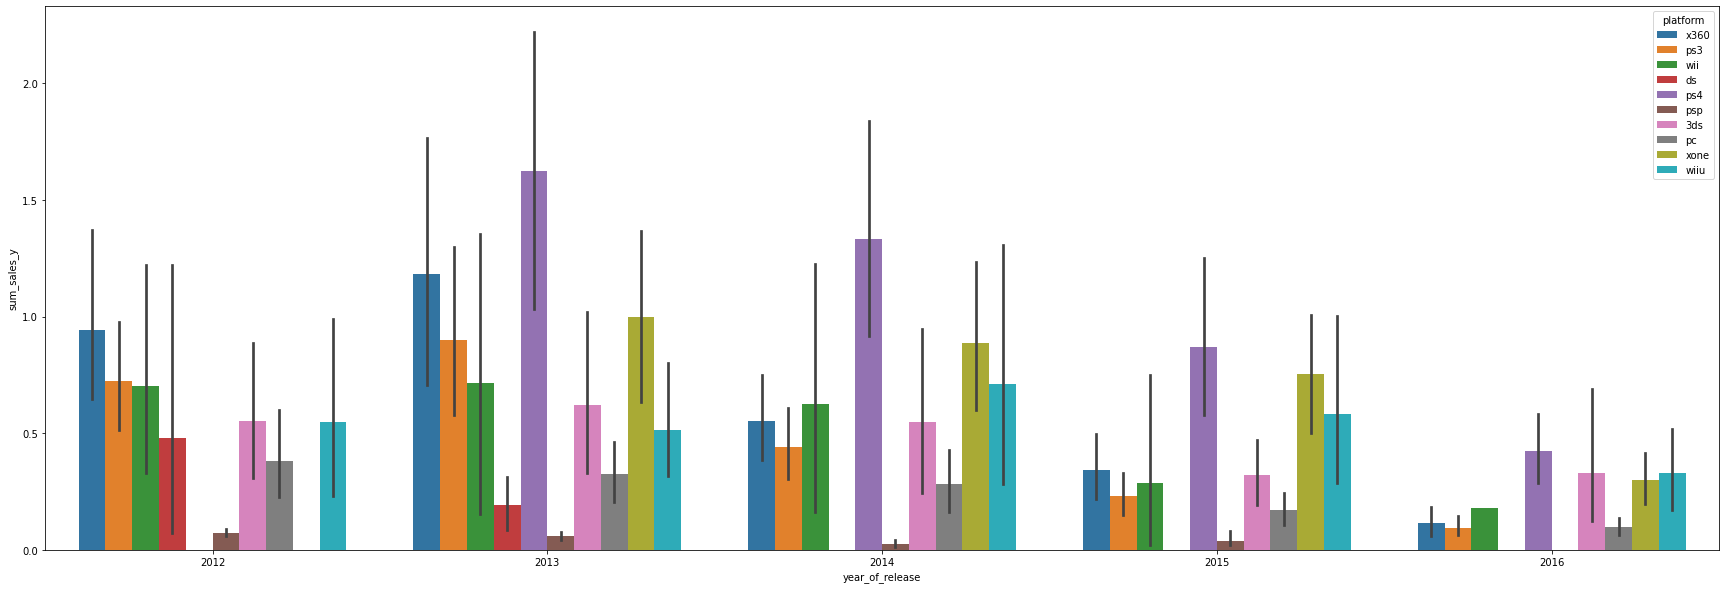

In [22]:
data_platform_2 = (
    data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .head(20)
)
data_platform_2 = data_platform_2.merge(data, on='platform')[['platform', 'year_of_release' ,'sum_sales_y']]
data_platform_2['sum_sales_y'] = data_platform_2[data_platform_2['sum_sales_y'] > 0]['sum_sales_y']
data_platform_2['year_of_release'] = data_platform_2[data_platform_2['year_of_release'] >= 2012]['year_of_release']
data_platform_2 = data_platform_2.dropna()
data_platform_2['year_of_release'] = data_platform_2['year_of_release'].astype(int)
sns.barplot(data=data_platform_2, x='year_of_release', y='sum_sales_y', hue='platform')
plt.gcf().set_size_inches(30,10)

**Потенциальные платформы:** К концу 2016 года самые популярные платформы: Xbox One, PS4 (появившаяся в 2013 году) и Nintendo 3DS (вышедшая в 2011 году), Wiiu (выпуск - 2012). Все три платформы уже какое-то время существуют на рынке и постепенно падают в продажах, тем не менее, могут оказаться прибыльными, поскольку на рынке находятся только 4-5 лет, а "держатся" платформы на рынке больше этого времени (из предыдущего графика). Xbox 360, wii и PS3 ещё используются, но в горащдо меньшей степени.

**3.5 Построение диаграммы размаха.** Необходимо построит "ящик с усами" для определение платформ с наибольшими медианными значениями, обозначения квантилей. Это позволит более точно определить самые продаваемые платформы.

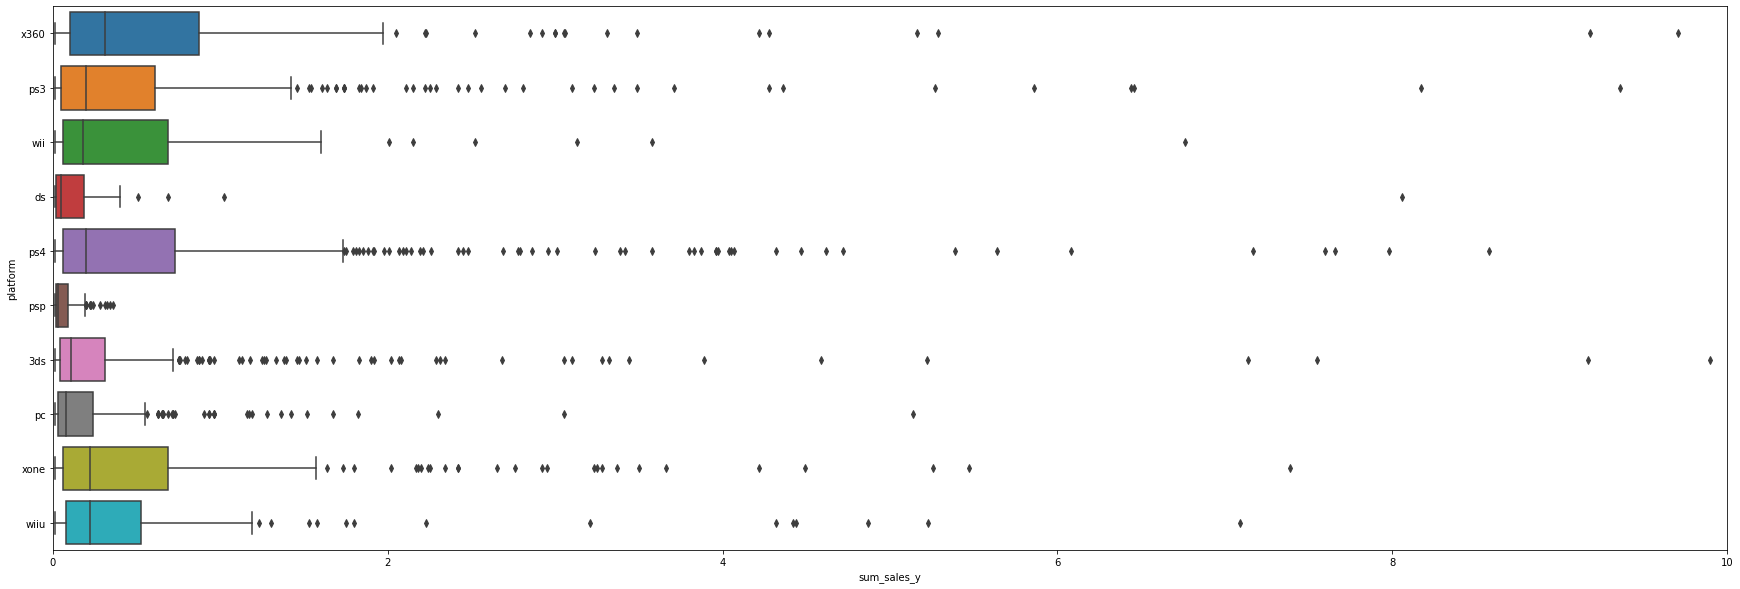

In [23]:
sns.boxplot(data=data_platform_2, x='sum_sales_y', y='platform', orient='h')
plt.xlim(0, 10)
plt.gcf().set_size_inches(30,10)

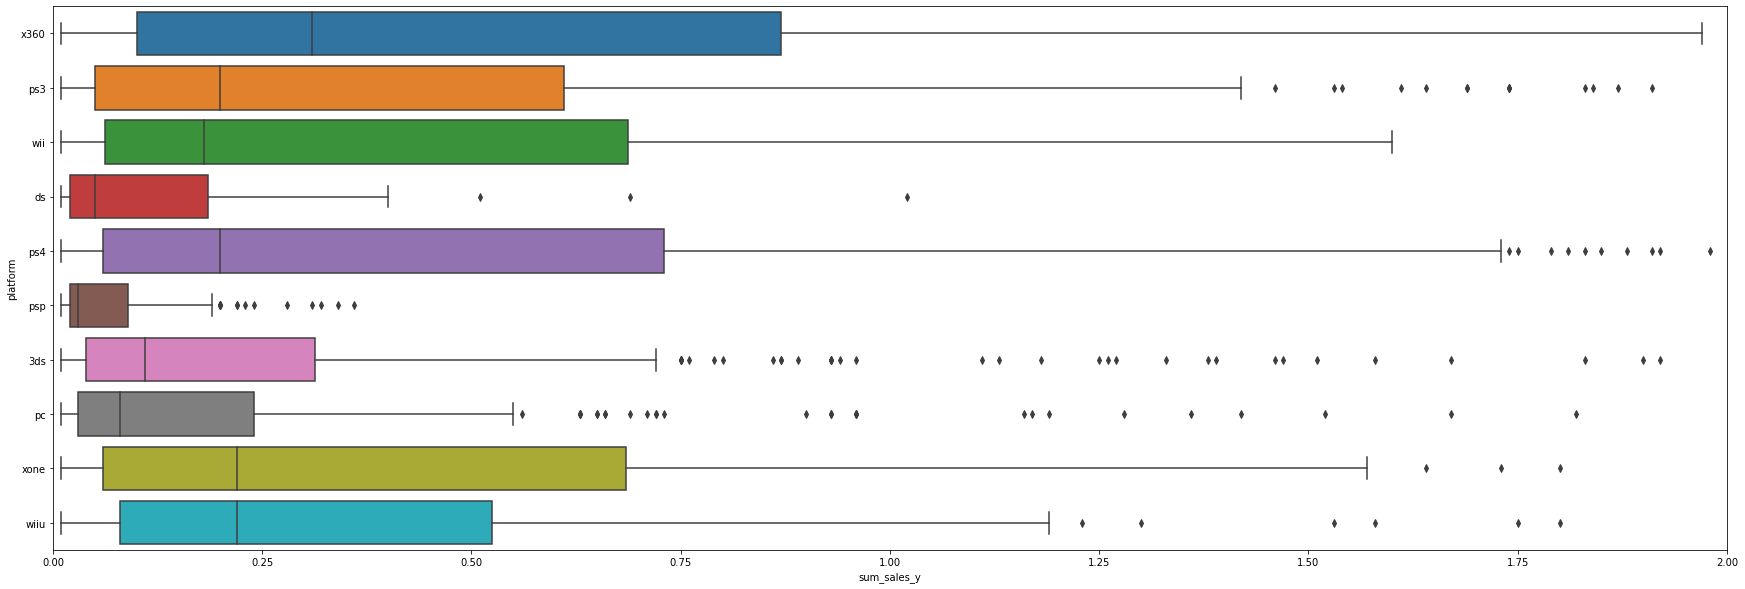

In [24]:
sns.boxplot(data=data_platform_2, x='sum_sales_y', y='platform', orient='h')
plt.xlim(0, 2)
plt.gcf().set_size_inches(30,10)

**На графике видно**, у wiiu, Xbox One, Xbox 360 (наибольшее значение) и  за рассматриваемый период медианное количество покупок наибольшее, далее на примерно равных местах PS3 и Wii. В целом, консоли имеют больше продаж, чем другие виды платформ. Довольно длинные "хвосты" имеют PS4, Xbox One, Xbox 360 и Wii. Это означает, что эти платформы за рассматриваемый период принесли бы больше всего прибыли. 

Так же стоит отметить, что несмотря на то, что Wii имеет больший "хвост", чем Wiiu, медианое значение у последнего выше. К тому же, Wii - устаревшая модель и продажи игр на неё будут снижаться.

Стабильно высокие продажи за рассматриваемый период у: Xbox 360 (с большим отрывом), Xbox One, Wiiu, PS4, PS3

**3.6 Построение диаграммы рассеения.** Определение связи между продажами на платформе и оценками пользователей и критиков. Это позволит определить, нужно ли опираться на эти оценки при выборе игры для продажи в магазине.

Корреляция между оценкой критиков и суммой продаж x360: 0.36057348885073365
Корреляция между оценкой пользователей и суммой продаж x360: 0.0061639786462133256


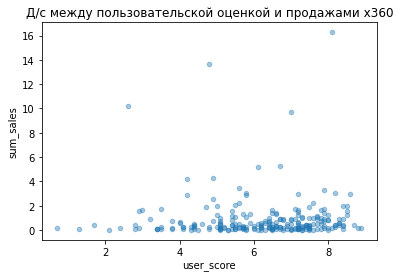

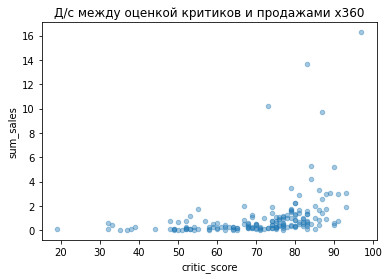

Корреляция между оценкой критиков и суммой продаж xone: 0.41699832800840175
Корреляция между оценкой пользователей и суммой продаж xone: -0.06892505328279412


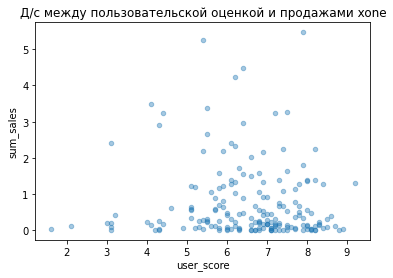

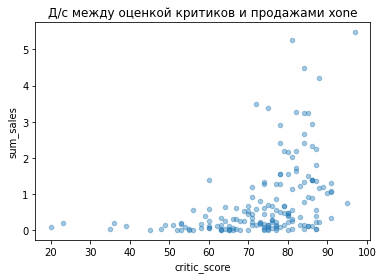

Корреляция между оценкой критиков и суммой продаж wiiu: 0.3483797601201749
Корреляция между оценкой пользователей и суммой продаж wiiu: 0.4002190202148617


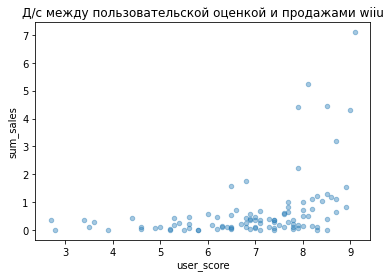

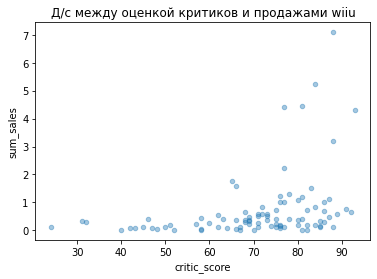

Корреляция между оценкой критиков и суммой продаж ps4: 0.406567902061781
Корреляция между оценкой пользователей и суммой продаж ps4: -0.031957110204556376


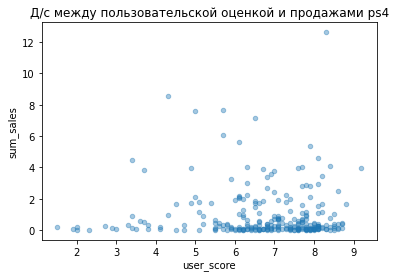

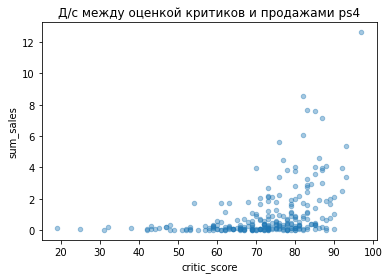

Корреляция между оценкой критиков и суммой продаж ps3: 0.3314972592629587
Корреляция между оценкой пользователей и суммой продаж ps3: -0.005143522887113828


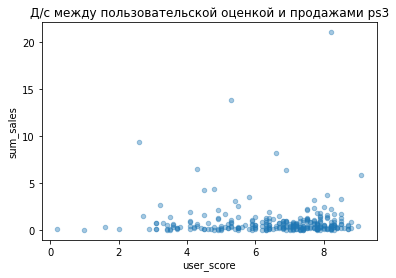

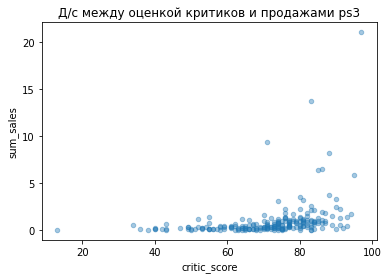

Корреляция между оценкой критиков и суммой продаж 3ds: 0.32080286953607845
Корреляция между оценкой пользователей и суммой продаж 3ds: 0.19758263411038596


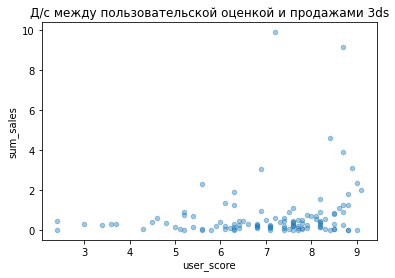

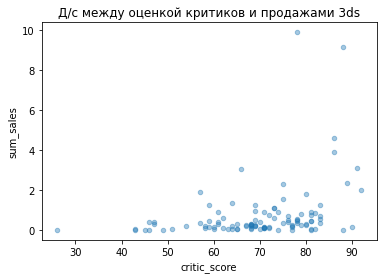

In [25]:
data_scores_corr = data_scores[data_scores['sum_sales'] > 0]
data_platform = ['x360', 'xone', 'wiiu', 'ps4', 'ps3', '3ds']
for v in data_platform:
    data_scores[data_scores['platform']==v].plot(x='user_score', y='sum_sales', kind='scatter', 
                 title=f'Д/с между пользовательской оценкой и продажами {v}',  alpha=0.4) 
    data_scores[data_scores['platform']==v].plot(x='critic_score', y='sum_sales', kind='scatter', 
                 title=f'Д/с между оценкой критиков и продажами {v}',  alpha=0.4)
    print(f'Корреляция между оценкой критиков и суммой продаж {v}:', data_scores_corr[data_scores_corr['platform']==v]['sum_sales']
          .corr(data_scores_corr[data_scores_corr['platform']==v]['critic_score']))
    print(f'Корреляция между оценкой пользователей и суммой продаж {v}:', data_scores_corr[data_scores_corr['platform']==v]['sum_sales']
          .corr(data_scores_corr[data_scores_corr['platform']==v]['user_score']))
    plt.show()

*3.6.1 Зависимость между оценкой и продажами игр на PS4*

Выбросы с максимальными продажами на графике соответсвуют очень высоким оценкам как пользователей, так и критиков. При этом, на графике связь оценок от критиков и продаж более явная, чем связь между оценками пользователей и продажами. обе группы имеют низкое количество продаж при больших оценках. Похоже, что здесь связь хоть и есть, но не явно - из-за высоких оценок большие продажи или большие продажи ведут к высоким оценкам.
Для расчёта корреляции лучше удалить данные от "нулевых" продаж.

Корреляция вышла такая, что связь между оценкой критиков и суммой продаж и между оценкой пользователей и суммой продаж - слабая и отрицательная. Что касается оценки пользователей, корреляция не только слабая, но и отрицательная. Возможно, пользователи, покупая игру, ожидали нечто большего и по итогу поставили низкую оценку. Критики же ставят оценки более объективно.

*3.6.2 Зависимость между оценкой и продажами игр на 3DS*

Здесь графики более схожи друг с другом. Некоторые крупные продажи связаны с более высокими оценками.

Корреляция между оценкой критиков и суммой продаж - умеренная. Корреляция между оценкой пользователей и объёмами продаж опять ниже, но прямая.

*3.6.3 Зависимость между оценкой и продажами игр на Wiiu*

Из рассмотренных вариантов здесь пока что представляется наиболее четкая картина о присутсвии корреляции (анализ значительно портит множество нулевых показателей в суммарных продажах)

Это же касается и корреляции - здесь она выше, чем в остальных случаях, но всё равно не превышает умеренную.

*3.6.4 Зависимость между оценкой и продажами игр на Xbox 360*

На графике пользовательских оценок видно, что высокие оценки бывают связаны с низкими продажами и наоборот. На графике оценок от критиков же видно, что с оценками выше 90 продажи практически не бывают минимальными.

Вывод по графикам подтверждает корреляция: между оценкой критиков и продажами она умеренная в то время как между оценками пользователей и продажами - практически нулевая.

*3.6.5 Зависимость между оценкой и продажами игр на Xbox One*

На графике оценки критиков и продаж высокие продажи в основном связаны с высокими оценками (график имеет "приподнятый" вид). В это же время на графике пользовательских оценок точки распределены более равномерно (с несколькими "выбросами" высоких продаж при оценке 5-6 баллов из 10).

Корреляция между оценками критиков и продажами здесь самая выоская из рассматриваемых платформ, тем не менее всё ещё умеренная. При этом корреляция между пользовательскими оценками и продажами отрицательная и не значительная (как в случае с PS4)

*3.6.6 Зависимость между оценкой и продажами игр на PS3*

Графики двух оценок достаточно пологие, тем не менее в случае с оценками от критиков к концу графика высокие оценки имеют высокие продажи.

Выводы о корреляции схожи с выводами о корреляции для PS4 и Xbox One.

**3.7 Соотнесение выводов о корреляции между оценкой и объёмом продаж по платформам** Определение общей зависимости позволит понять, какое правило работает для платформ в целом.

**Итого**, корреляция между оценкой критиков и продаж очевидна на всех платформах, что нельзя сказать об оценках пользователей. При этом невозможно делать выводы, что на что влияет - объём продаж на оценки или же оценки на объём продаж. Опираться на оценки пользователей по рассмотренным платформам смысла нет - они более субъективны и не показывают даже умеренной корреляции.

**3.8 Распределение игр по жанрам.** Требуется определить, какой жанр может стать самым прибыльным на основании того, какой продается больше всего.

Text(0.5, 0, 'Жанр')

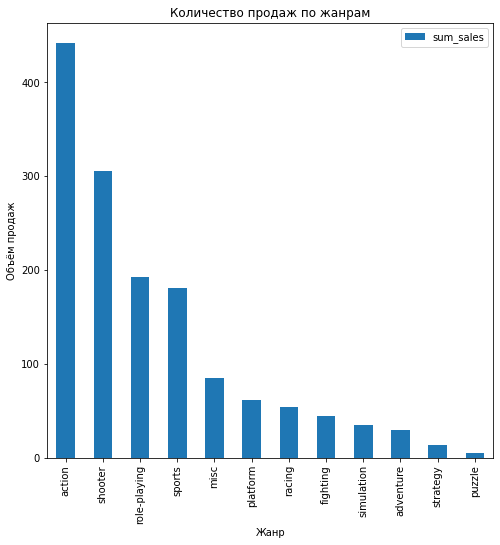

In [32]:
(
    data_scores.pivot_table(index='genre', values=['sum_sales'], aggfunc='sum')
    .sort_values(by = 'sum_sales', ascending=False)
    .plot(kind='bar', figsize=(8, 8), title='Количество продаж по жанрам')
)
plt.ylabel('Объём продаж')
plt.xlabel('Жанр')

За актуальный период больше всего продаж было у экшн-игр, шутеров и ролплея, немного ниже - спортивных игр. Остальные жанры - примерно на одном уровне (стратегии и пазлы-загадки имеют продажи значительно ниже). При этом жанр экшн - значительно превышает остальные жанры.

Для жанра action примерное медианное значение продаж в тыс. шт: 120
Для жанра sports примерное медианное значение продаж в тыс. шт: 240
Для жанра shooter примерное медианное значение продаж в тыс. шт: 440
Для жанра role-playing примерное медианное значение продаж в тыс. шт: 140
Для жанра platform примерное медианное значение продаж в тыс. шт: 210
Для жанра misc примерное медианное значение продаж в тыс. шт: 120
Для жанра racing примерное медианное значение продаж в тыс. шт: 139
Для жанра fighting примерное медианное значение продаж в тыс. шт: 130
Для жанра simulation примерное медианное значение продаж в тыс. шт: 120
Для жанра puzzle примерное медианное значение продаж в тыс. шт: 45
Для жанра adventure примерное медианное значение продаж в тыс. шт: 30
Для жанра strategy примерное медианное значение продаж в тыс. шт: 80


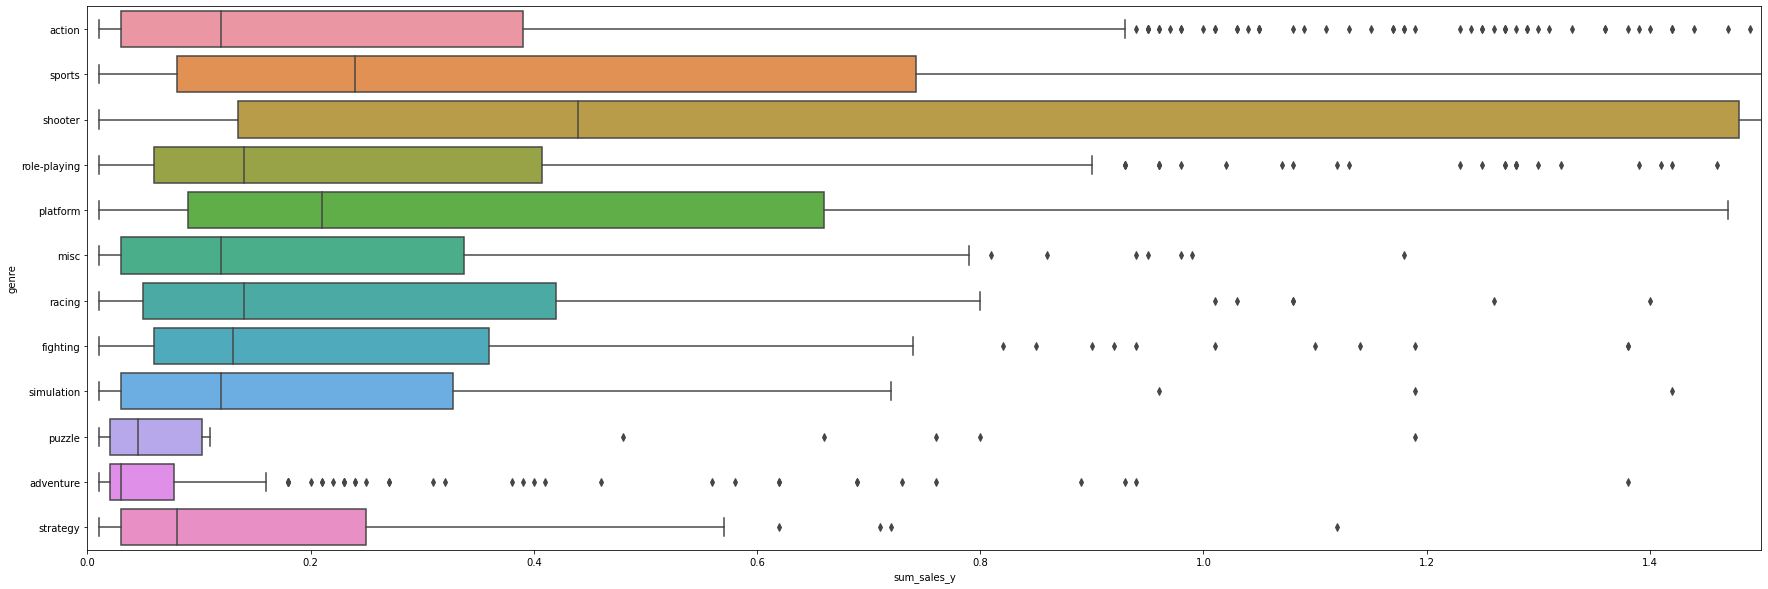

In [33]:
data_genre = (
    data.pivot_table(index='genre', values='sum_sales', aggfunc='sum')
    .sort_values('sum_sales', ascending=False)
    .head(20)
)
data_genre = data_genre.merge(data, on='genre')[['genre', 'year_of_release' ,'sum_sales_y']]
data_genre['sum_sales_y'] = data_genre[data_genre['sum_sales_y'] > 0]['sum_sales_y']
data_genre['year_of_release'] = data_genre[data_genre['year_of_release'] >= 2012]['year_of_release']
data_genre = data_genre.dropna()
data_genre['year_of_release'] = data_genre['year_of_release'].astype(int)
sns.boxplot(data=data_genre, x='sum_sales_y', y='genre', orient='h')
plt.xlim(0, 1.5)
plt.gcf().set_size_inches(30,10)
for v in data_genre['genre'].unique():
    print(f'Для жанра {v} примерное медианное значение продаж в тыс. шт:', 
          int(data_genre[data_genre['genre'] == v]['sum_sales_y'].median()*1000))

Если смотреть по графику размаха, количество список топовых медианных продаж отличается от списка общих продаж. Наибольшее значение - у шутеров (порядка 440 тысяч продаж), на втором месте - спорт и на 3 - платформеры (с большим отрывом, 240 и 210 тыс. продаж соответсвенно). Следовательно, в среднем больше всего продаются шутеры.

# Портрет пользователя

Портрет пользователя позволяет понять, на какой географический рынок нужно ориентироваться бизнесу и можно ли сочетать несколько рынков, поскольку обычно специфика таких рынков различается.

**4.1 Определение самых популярных платформ по регионам** Рассматриваются Северная Америка (СА), Япония, Европа.

*4.1.1* Северная Америка

,na_sales,share_na
platform,,
x360,140.05,0.22
ps4,108.74,0.17
ps3,103.38,0.16
xone,93.12,0.14
3ds,55.31,0.09
other,145.68,0.23


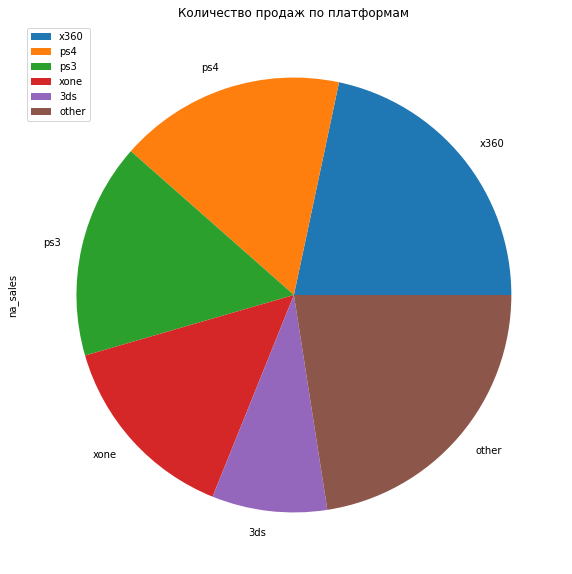

In [34]:
data_na_platform = data_scores.groupby('platform').agg({'na_sales':'sum'}) \
    .sort_values(by='na_sales', ascending=False)
data_na_platform.reset_index(inplace=True)
data_na_platform_1 = {'platform': 'other', 'na_sales': sum(data_na_platform['na_sales'].tail(7))}
data_na_platform = data_na_platform.head()
data_na_platform = data_na_platform.append(data_na_platform_1, ignore_index=True)
data_na_platform['share_na'] = round(data_na_platform['na_sales'] / data_na_platform['na_sales'].sum(), 2)
data_na_platform.set_index('platform',inplace=True)
data_na_platform.plot(kind='pie', figsize=(10,10), y= 'na_sales', title='Количество продаж по платформам')
data_na_platform

На рынке Северной Америки самую большую часть занимает Xbox 360 (за период 2012-2016 гг.), на втором месте - PS4, далее с небольшим различием Xbox One и PS3. 3ds имеет небольшую долю рынка (около 9%).

*4.1.2 Европа*

,eu_sales,share_eu
platform,,
ps4,141.09,0.26
ps3,106.86,0.19
x360,74.52,0.14
xone,51.59,0.09
3ds,42.64,0.08
other,132.76,0.24


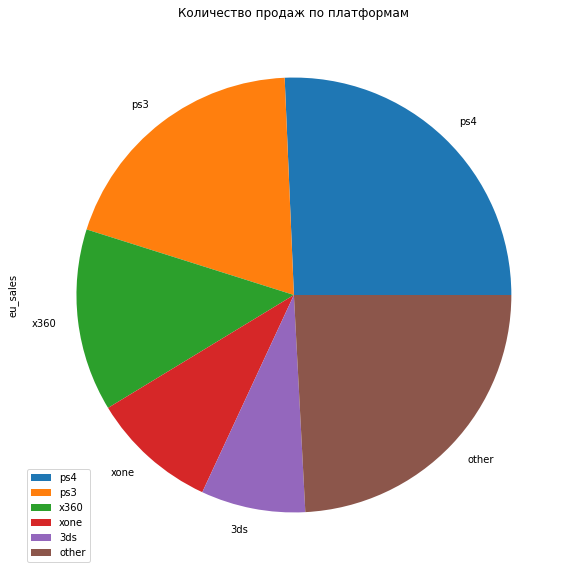

In [35]:
data_eu_platform = data_scores.groupby('platform').agg({'eu_sales':'sum'}) \
    .sort_values(by='eu_sales', ascending=False)
data_eu_platform.reset_index(inplace=True)
data_eu_platform_1 = {'platform': 'other', 'eu_sales': sum(data_eu_platform['eu_sales'].tail(7))}
data_eu_platform = data_eu_platform.head()
data_eu_platform = data_eu_platform.append(data_eu_platform_1, ignore_index=True)
data_eu_platform['share_eu'] = round(data_eu_platform['eu_sales'] / data_eu_platform['eu_sales'].sum(), 2)
data_eu_platform.set_index('platform',inplace=True)
data_eu_platform.plot(kind='pie', figsize=(10,10), y= 'eu_sales', title='Количество продаж по платформам')
data_eu_platform

На европейском рынке большую долю имеет PS4 (26%) и PS3 (19%), и только затем два поколения Xbox (суммарно 23%). То есть, здесь около половины рынка занимают PS.

*4.1.3 Япония*

,jp_sales,share_jp
platform,,
3ds,87.79,0.43
ps3,35.29,0.17
psv,21.04,0.10
ps4,15.96,0.08
wiiu,13.01,0.06
other,32.50,0.16


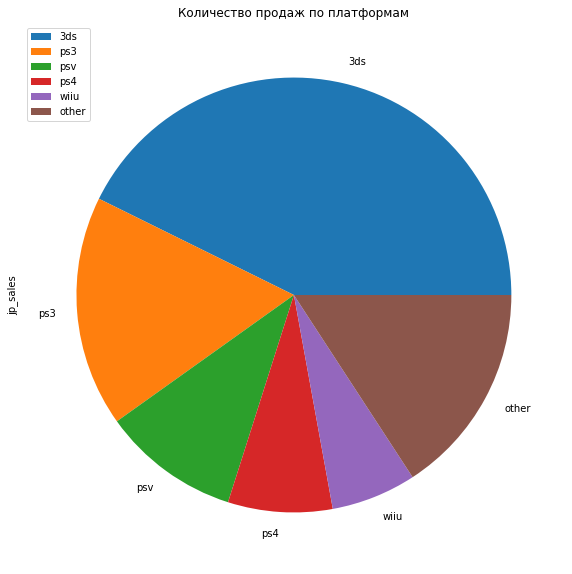

In [36]:
data_jp_platform = data_scores.groupby('platform').agg({'jp_sales':'sum'}) \
    .sort_values(by='jp_sales', ascending=False)
data_jp_platform.reset_index(inplace=True)
data_jp_platform_1 = {'platform': 'other', 'jp_sales': sum(data_jp_platform['jp_sales'].tail(7))}
data_jp_platform = data_jp_platform.head()
data_jp_platform = data_jp_platform.append(data_jp_platform_1, ignore_index=True)
data_jp_platform['share_jp'] = round(data_jp_platform['jp_sales'] / data_jp_platform['jp_sales'].sum(), 2)
data_jp_platform.set_index('platform',inplace=True)
data_jp_platform.plot(kind='pie', figsize=(10,10), y= 'jp_sales', title='Количество продаж по платформам')
data_jp_platform

Самая популярная платформа в Японии - 3DS, около 43% от всех покупаемых игр. Вторая по популярности - PS3, 17%.  На 3 месте - PSV (портативная консоль). Далее - примерно с равным количеством продаж - PS4, Wiiu (8% и 6% соответсвенно). 3 из 5 платформ являются, либо напоминают портативную приставку.

**4.2 Определение самых популярных жанров по регионам** Рассматриваются те же самые регионы.

*4.2.1 Северная Америка*

In [37]:
len(data['genre'].unique())

12

,na_sales,share_na
genre,,
action,177.84,0.30
shooter,144.77,0.24
sports,81.53,0.14
role-playing,64.00,0.11
misc,38.19,0.06
other,84.64,0.14


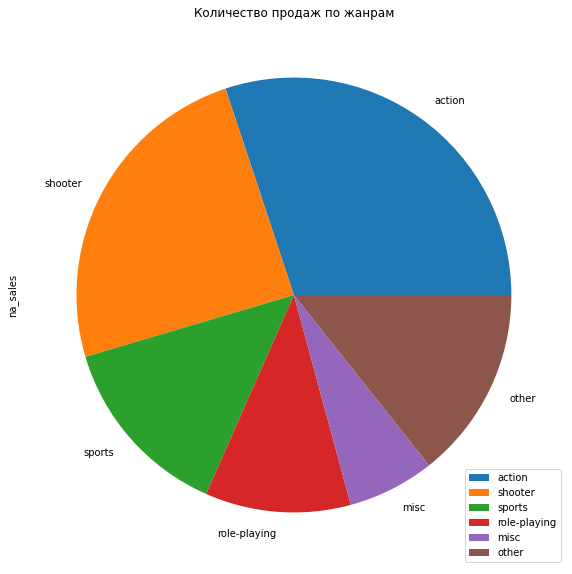

In [38]:
data_na_genre = data_scores.groupby('genre').agg({'na_sales':'sum'}) \
    .sort_values(by='na_sales', ascending=False)
data_na_genre.reset_index(inplace=True)
data_na_genre_1 = {'genre': 'other', 'na_sales': sum(data_na_genre['na_sales'].tail(7))}
data_na_genre = data_na_genre.head()
data_na_genre = data_na_genre.append(data_na_genre_1, ignore_index=True)
data_na_genre['share_na'] = round(data_na_genre['na_sales'] / data_na_genre['na_sales'].sum(), 2)
data_na_genre.set_index('genre',inplace=True)
data_na_genre.plot(kind='pie', figsize=(10,10), y= 'na_sales', title='Количество продаж по жанрам')
data_na_genre

Самый популярный жанр в рынке СА - экшн, около 30% и следом - шутеры, 24%. Далее происходит резкий спад - спорт около 14%, и ролевые игры 11%, другие - 6%.

*4.2.2 Европа*

,eu_sales,share_eu
genre,,
action,159.34,0.31
shooter,113.47,0.22
sports,69.09,0.14
role-playing,48.53,0.10
racing,27.29,0.05
other,89.10,0.18


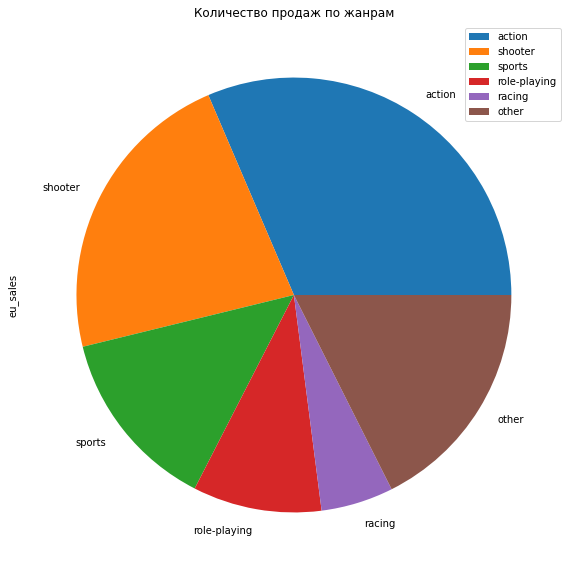

In [39]:
data_eu_genre = data_scores.groupby('genre').agg({'eu_sales':'sum'}) \
    .sort_values(by='eu_sales', ascending=False)
data_eu_genre.reset_index(inplace=True)
data_eu_genre_1 = {'genre': 'other', 'eu_sales': sum(data_eu_genre['eu_sales'].tail(7))}
data_eu_genre = data_eu_genre.head()
data_eu_genre = data_eu_genre.append(data_eu_genre_1, ignore_index=True)
data_eu_genre['share_eu'] = round(data_eu_genre['eu_sales'] / data_eu_genre['eu_sales'].sum(), 2)
data_eu_genre.set_index('genre',inplace=True)
data_eu_genre.plot(kind='pie', figsize=(10,10), y= 'eu_sales', title='Количество продаж по жанрам')
data_eu_genre

На Европейском рынке схожее распределение с Северной Америкой, разница лишь в порядке наличии типа "другие". Здесь на 5 месте - гонки (5%).

*4.2.3 Япония*

,jp_sales,share_jp
genre,,
role-playing,65.44,0.34
action,52.80,0.27
misc,12.86,0.07
simulation,10.41,0.05
fighting,9.44,0.05
other,41.63,0.22


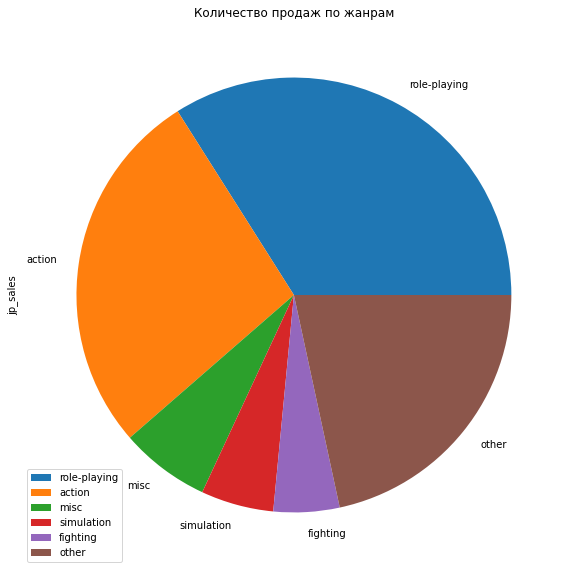

In [40]:
data_jp_genre = data_scores.groupby('genre').agg({'jp_sales':'sum'}) \
    .sort_values(by='jp_sales', ascending=False)
data_jp_genre.reset_index(inplace=True)
data_jp_genre_1 = {'genre': 'other', 'jp_sales': sum(data_jp_genre['jp_sales'].tail(7))}
data_jp_genre = data_jp_genre.head()
data_jp_genre = data_jp_genre.append(data_jp_genre_1, ignore_index=True)
data_jp_genre['share_jp'] = round(data_jp_genre['jp_sales'] / data_jp_genre['jp_sales'].sum(), 2)
data_jp_genre.set_index('genre',inplace=True)
data_jp_genre.plot(kind='pie', figsize=(10,10), y= 'jp_sales', title='Количество продаж по жанрам')
data_jp_genre

Рынок в Японии сильно отличается от двух предыдущих: здесь на первом месте и ролплей, затем экшн и другие. Шутеры не присутствуют вообще. Вместо этого - симуляции (5%) и игры с борьбой - 5%.

**Таким образом**, пользователь на американском рынке предпочитает консольные игры (в основном, как платформа используется более старый Xbox 360 и более новый PS4), при этом шутеры, экшн и спорт. Пользователь с европейского рынка так же предпочитает консоль, но уже PS 4 и 3 поколения, игры такие же, как и предыдущий пользователь.

Пользователь с японского рынка предпочитает портативную приставку и, соответсвенно, другой тип игр: ролплей, симуляции. Но и здесь экшн имеет высокую долю он продаж.

**4.3 Влияние рейтинга ESRB на продажи.** Стоит принимать во внимание, что рейтинг выдается только оффлайн играм с американским или канадским происхождением.

In [41]:
data_scores['rating'] = data_scores['rating'].fillna('NA')

Так можно учесть то, как на японском и европейском рынке влияет рейтинг, выдаваемый американской компанией на продажи игр.

*4.3.1 Северная Америка*

Text(0.5, 0, 'Рейтинг ESRB')

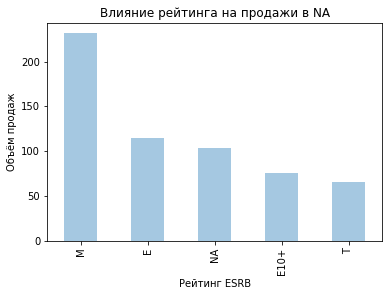

In [42]:
(
    data_scores
    .groupby('rating')['na_sales']
    .sum().sort_values(ascending=False)
    .plot(x='rating', y='na_sales', kind='bar', 
                 title='Влияние рейтинга на продажи в NA',  alpha=0.4) 
)
plt.ylabel('Объём продаж')
plt.xlabel('Рейтинг ESRB')

В Северной Америке много игр с пометкой "для взрослых", игры других рейтингов продаются примерно в равном размере. Здесь видно, что отсутсвие рейтинга - не препятствие для покупки игры (такие игры продаются даже выше, чем игры "для подростков")

*4.3.2 Европа*

Text(0.5, 0, 'Рейтинг ESRB')

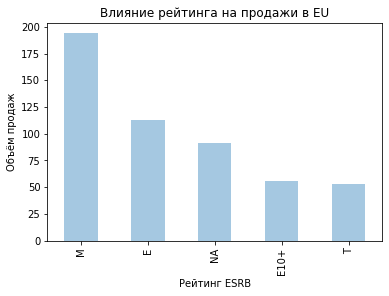

In [43]:
(
    data_scores
    .groupby('rating')['eu_sales']
    .sum().sort_values(ascending=False)
    .plot(x='rating', y='eu_sales', kind='bar', 
                 title='Влияние рейтинга на продажи в EU',  alpha=0.4) 
)
plt.ylabel('Объём продаж')
plt.xlabel('Рейтинг ESRB')

В Европе график схож с предыдущим.

*4.3.3 Япония*

Text(0.5, 0, 'Рейтинг ESRB')

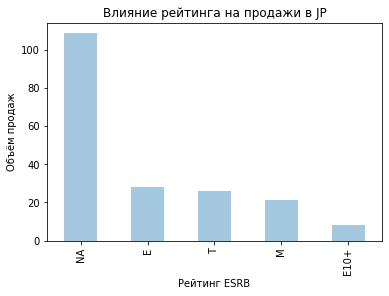

In [44]:
(
    data_scores
    .groupby('rating')['jp_sales']
    .sum().sort_values(ascending=False)
    .plot(x='rating', y='jp_sales', kind='bar', 
                 title='Влияние рейтинга на продажи в JP',  alpha=0.4) 
)
plt.ylabel('Объём продаж')
plt.xlabel('Рейтинг ESRB')

Из графика можно выделить, что игры "для всех" продаются лучше остальных рейтингов. Игры "для подростков" имеют примерно схожие продажи с предыдущим, и "для взрослых" продаются на чуть более низком уровне. К тому же, кажется, что для японцев наличие рейтинга - не особо важный показатель, очень много игр продаются и без него.

**Вывод:** можно говорить о том, что в каждом регионе своя специфика рынка, если магазин хочет работать на несколько рынков, то лучше объединять Северную Америку и Европу (это возможно, поскольку организация - интернет-магазин). Что касается рейтинга, он важнее на европейском и американском рынке, чем на японском.

# Проверка гипотез

Для сравнения двух совокупностей используется метод scipy.stats.ttest_ind(). В нашем случае выборки хоть и взяты из одного датасета, их дисперсии скорее не равны (видно было в предыдущих заданиях на графиках, что их количество и параметры разные), при этом использование t-критерия возможно для двух нормальный совокупностей, в случае различия их дисперсий, добавляют параметр equal_var=False к описанному ранее методу.

При этом стоит упомянуть, что рассматриваемые совокупности не зависят друг от друга. При этом, рассматрвиаемые выборки более нескольких десятков значений, а значит выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности.

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC - одинаковые?** Если они одинаковые, то для оценки игры важнее наполнение, чем одна или вторая платформа.

Гипотеза формируется исходя из задачи, здесь она - определить, средние пользовательские рейтинги платформ Xbox One и PC - одинаковые? Здесь мы сравниваем два срендих совокупностей. Сначала формулируется нулевая гипотеза (указана ниже), она формируется так, чтобы в ней присутствовал знак равенства. 

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые;

In [45]:
print('Дисперсия оценок Xbox One:', data_scores[(data_scores['platform'] == 'xone')]['user_score'].var())
print('Дисперсия оценок ПК:', data_scores[(data_scores['platform'] == 'pc')]['user_score'].var())

Дисперсия оценок Xbox One: 1.9069968429360695
Дисперсия оценок ПК: 2.770443997158418


In [46]:
results = st.ttest_ind(data_scores[(data_scores['platform'] == 'xone') & (~data_scores['user_score'].isnull())]['user_score'],
                       data_scores[(data_scores['platform'] == 'pc') & (~data_scores['user_score'].isnull())]['user_score'],
                      equal_var=False) #выборки различаются и по количеству, и по дисперсии исходя из предыдущих заданий
alpha = 0.05 #стандартное значение для альфа

print('p-значение:', results.pvalue)
# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Для сравнения использованы средние значения пользовательских оценок по двум платформам. Выяснилось, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Даже при условии понижения значения альфа до 0,01 или повышения до 0,1, гипотеза не будет отвергнута.

**5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») - разные?** Если они разные, то пользователи в этих двух жанрах имеют в целом разное ожидание от игры и оценивают их по-разному.

Здесь задание такое, что два средних совокупностей - разные. Но нулевая гипотеза всегда формулируется, используя знак равенства.

**H0:** Средние пользовательские рейтинги жанров Action и Sports одинаковые;

**H1:** Средние пользовательские рейтинги жанров Action и Sports разные;


In [47]:
print('Дисперсия оценок Экшн:', data_scores[(data_scores['genre'] == 'action')]['user_score'].var())
print('Дисперсия оценок Спорт:', data_scores[(data_scores['genre'] == 'sports')]['user_score'].var())

Дисперсия оценок Экшн: 1.8890840494348111
Дисперсия оценок Спорт: 3.022890298704732


In [48]:
results = st.ttest_ind(data_scores[(data_scores['genre'] == 'action') & (~data_scores['user_score'].isnull())]['user_score'],
                       data_scores[(data_scores['genre'] == 'sports') & (~data_scores['user_score'].isnull())]['user_score'],
                      equal_var=False)
alpha = 0.05 
print('p-значение:', results.pvalue)
# вывод значения p-value на экран 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('Средний рейтинг экшн-игр:', data_scores[data_scores['genre'] == 'action']['user_score'].median())
print('Средний рейтинг спортивных игр:', data_scores[data_scores['genre'] == 'sports']['user_score'].median())

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу
Средний рейтинг экшн-игр: 7.1
Средний рейтинг спортивных игр: 5.7


Здесь сравнивалось, равны ли пользовательские оценки для двух жанров. Выяснилось, что невозможно принять нулевую гипотезу. Тогда пользуемся альтернативной: средние пользовательские рейтинги жанров Action и Sports разные. Если посмотреть на медианный рейтинг по двум жанрам, то он действительно различается.

**По итогу** проверки гипотез, было выявлено, что в среднем пользовательские рейтинги на платформах Xbox One и PC одинаковые; а рейтинги экшн- и спротивных игр разные.

# Вывод

**Подготовка данных**

В данных присутсвовали неявные дубликаты в разделе возрастного рейтинга, которые были удалены.

Данные не за все периоды рекомендуются к анализу (был выбран период с 2012 по 2016 год - за это время не появилось новых консолей, рынок стабилен и вполне предсказуемо себя ведет)

**Исследовательский анализ данных**

Выявлена закономерность и описаны причины изменения продаж игр (пик на 2008 год, и дальнейшее падение из-за кризиса и способов получения "пиратской" версии игры, возможное отсутсвие полного количества данных за последний период)

Определено, что на данный момент (конец 2016 года) лидирующие платформы - PS4, Xbox One, 3DS, то есть в основном консоли.

Отзывы пользователей меньше связаны с количеством продаж, чем отзывы критиков.

Самые прибыльные жанры - экшн, шутеры, спорт.

**Пользовательский портрет**

Портреты пользователя в Северной Америке и Европе схожи - игры на консолях с приоритетом экшн-играм и шутерам. Европейский рынок больше "любит" консоли PS, в то время как на американском первое место занимает Xbox360 (стоит учитывать то, что это уже устаревающая модель и скоро продажи игр на неё будут резко падать).

В Японии люди в основном пользуются портативными игровыми системами и, соответсвенно, играют в более спокойные игры - симуляторы, платформеры, ролплей.

**Гипотезы**

Выявлено, что средние оценки для Xbox One и PC одинаковые. Это говорит о том, что люди в целом оценивают игру, не основываясь на то - консоль это или персональный компьютер. 

Рейтинги спортивных и экшн-игр оказались разными. Если смотреть по медиане, то рейтинг спортивных игр ниже (что интересно, ниже и их объём продаж, но здесь сложно говорить о том, что является причиной чего)

**Рекомендация**

Потенциально прибыльный продукт на 2017 год для Европейского и американского рынка - игра на консоль (если делать упор на одну - лучше PS4, она входит в топ-1 в двух рынках), шутер или экшн (лучше брать экшн, он самый популярный). 

Самые продаваемые игры для двух рынков - категория "для взрослых", также популярны "для всех". Несмотря на то, что кажется, что больше в игры играют подростки - категория "для подростков" не популярна, так что делать на неё упор не нужно.

В целом, ориентироваться об успешности игры лучше по оценкам критиков, поскольку оценка пользователей происходит скорее постфактум и может быть занижена вследсвие завышенных ожиданий от игры.

**Итого:**

Рекомендуемые платформы: Xbox One (как замена очень популярной в прошлом, но не в 2016 году Xbox 360) и PS4.

Самый популярный жанр - шутер (он более стабилен, хоть экшн и имеет больше очень популярных игр)

Для рекламы на северо-американском и евпропейском игры лучше выпускать игры с рейтингом M (эти два региона можно объединить в один рынок, портреты пользователей очень схожи)

Обращать внимание на отзывы покупателей нет особого смысла, в то время как отзывы критиков могут помочь принять решение.